## Module 8 - Case study 1

1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.

[Hint: Explore datasets module from scikit learn]


2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.


3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.

[Hint: Refer to decomposition module of scikit learn]


4. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.

[Hint: Project both the train and test samples to the new subspace]


5. Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [5]:
digits.images.shape

(1797, 8, 8)

<Figure size 432x288 with 0 Axes>

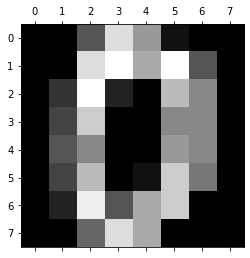

In [6]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

<Figure size 432x288 with 0 Axes>

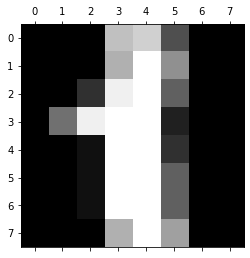

In [7]:
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show()

<Figure size 432x288 with 0 Axes>

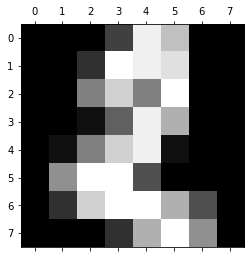

In [8]:
plt.gray() 
plt.matshow(digits.images[2]) 
plt.show()

2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [9]:
x = digits.data
y = digits.target

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
len(x_train), len(x_test), len(y_train), len(y_test)

(1437, 360, 1437, 360)

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(multi_class='auto')
log_reg_model.fit(x_train, y_train)

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_predict = log_reg_model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
accuracy_score(y_test, y_predict)

0.95

In [17]:
confusion_matrix(y_test, y_predict)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 34,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 37]], dtype=int64)

3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [20]:
pd.DataFrame(x_train_pca).head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,23.378779,4.966175,18.368372,-6.112142,1.637360,4.083605,4.741611,-11.947354,0.254178,-4.136722,...,0.008634,-0.009892,-0.033711,-0.003055,0.001661,-0.000232,0.003040,-0.000000e+00,-0.000000e+00,3.637552e-14
1,-15.215429,15.486132,6.708573,0.977767,14.188252,8.493385,0.079997,3.708569,10.859367,-7.423108,...,0.094030,-0.041502,0.042313,-0.015820,-0.005215,-0.008684,0.008268,-4.064288e-17,-1.154145e-16,-9.706306e-18


In [21]:
for i in range(len(list(pca.explained_variance_ratio_))):
    print(i, sum(list(pca.explained_variance_ratio_)[:i+1]))

0 0.14561619907571977
1 0.2752799149616241
2 0.38774344923901843
3 0.4752705342083239
4 0.5352617763789123
5 0.5873924396638428
6 0.6359281793786681
7 0.6744412207738617
8 0.7090089760769845
9 0.7406031241343906
10 0.7654324232702091
11 0.7885042694466315
12 0.8072431794193063
13 0.8239590106153502
14 0.8397225894970199
15 0.8547714412988151
16 0.867558053417264
17 0.8797687385526712
18 0.8902609378038637
19 0.8995342537734794
20 0.9082743741747202
21 0.9162230559525453
22 0.9236267472195631
23 0.9307221371880416
24 0.9374669726152157
25 0.9435422980492609
26 0.9489200311388137
27 0.9540260163812952
28 0.9586141685527484
29 0.9626575366807046
30 0.9662543631529881
31 0.9696405699754428
32 0.9727144269397755
33 0.9756212576068486
34 0.9784864818550804
35 0.9810920200410955
36 0.9835462230067876
37 0.985757655411177
38 0.9877007901270356
39 0.9895646288827504
40 0.9913157908472539
41 0.9928144104522006
42 0.9941882409230234
43 0.99542294553238
44 0.9964134181692618
45 0.9972511440610582


#### If we take 27 (index 0 to 26) components we can get 94.9% (equal to 95%) of the information.

4. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.

In [22]:
# re-applying PCA with 27 components to apply prediction with 95% of the information

pca = PCA(n_components=27)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [23]:
pd.DataFrame(x_train_pca).head(2)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,23.378778,4.966176,18.368372,-6.112140,1.637361,4.083595,4.741580,-11.947342,0.254123,-4.136646,...,0.859181,6.151458,2.376238,-2.481894,3.371293,8.915721,0.725209,4.647309,5.642472,4.88772
1,-15.215429,15.486131,6.708573,0.977764,14.188241,8.493412,0.080106,3.708538,10.859481,-7.423379,...,3.416017,1.196104,-0.018245,-1.093002,-5.557051,-0.853382,-2.426338,2.165529,-1.418283,0.93390


In [24]:
log_reg_model2 = LogisticRegression()
log_reg_model2.fit(x_train_pca, y_train)

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred_pca = log_reg_model2.predict(x_test_pca)

In [26]:
confusion_matrix(y_test, y_pred_pca)

array([[ 0,  0,  1,  0,  0,  1,  0, 25,  0,  0],
       [ 1, 11,  6,  7,  2,  1,  0,  0,  5,  2],
       [ 1,  1, 11,  1,  0,  0, 20,  2,  0,  0],
       [ 1,  6,  0,  0, 10,  0,  8,  0,  4,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  2,  0, 19],
       [ 0,  1,  0,  1,  9, 24,  0,  0,  4,  1],
       [ 0,  3,  7, 17,  0,  0,  0,  1,  9,  7],
       [27,  0,  0,  1,  0,  3,  3,  2,  0,  3],
       [ 7,  2, 17,  3,  0,  1,  0,  0,  6,  3],
       [ 1,  4,  0,  0, 23,  3,  1,  4,  3,  2]], dtype=int64)

In [27]:
accuracy_score(y_test,  y_pred_pca)

0.15555555555555556

##### Accuracy dropped drasticall by applying dimentionality reduction.

5. Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.

In [28]:
#model1

confusion_matrix(y_test, y_predict)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 34,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 37]], dtype=int64)

In [29]:
accurate_pred_count = 27+31+34+29+30+39+43+37+35+37
accurate_pred_count

342

In [30]:
wrong_pred_count = 1+2+1+1+2+1+1+1+2+2+1+3
wrong_pred_count

18

In [31]:
#model2

confusion_matrix(y_test, y_pred_pca)

array([[ 0,  0,  1,  0,  0,  1,  0, 25,  0,  0],
       [ 1, 11,  6,  7,  2,  1,  0,  0,  5,  2],
       [ 1,  1, 11,  1,  0,  0, 20,  2,  0,  0],
       [ 1,  6,  0,  0, 10,  0,  8,  0,  4,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  2,  0, 19],
       [ 0,  1,  0,  1,  9, 24,  0,  0,  4,  1],
       [ 0,  3,  7, 17,  0,  0,  0,  1,  9,  7],
       [27,  0,  0,  1,  0,  3,  3,  2,  0,  3],
       [ 7,  2, 17,  3,  0,  1,  0,  0,  6,  3],
       [ 1,  4,  0,  0, 23,  3,  1,  4,  3,  2]], dtype=int64)

In [32]:
accu_pred = 11+11+24+2+6+2
accu_pred

56

In [33]:
wrong_pred = 360-56
wrong_pred

304

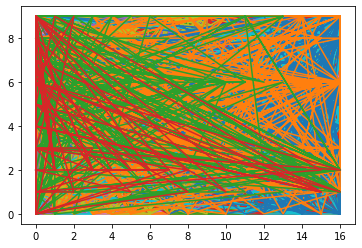

In [38]:
plt.plot(x_test,y_test)
plt.show()

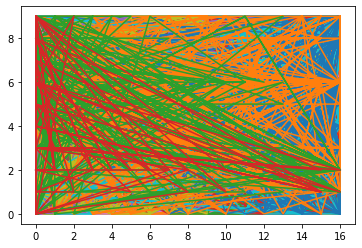

In [39]:
plt.plot(x_test, y_predict)
plt.show()

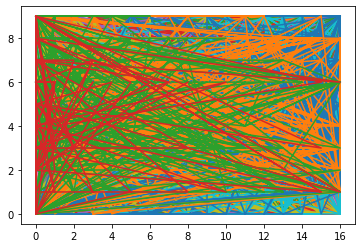

In [43]:
plt.plot(x_test, y_pred_pca)
plt.show()